# ABOUT
- this notebook performs **hypothesis testing for effect of gamma**
- Background:
    - gamma controls the extent to which positive item information are instilled into the final user embedding in SimpleX
    - hypothesis testing could be utilized to invstigate if there is any significant positive effect
- Approach:
    - we conduct a Paired/dependent T-test
        - randomly sample 20 hyperparameter sets
        - each set consists of 6 hyperparameters: 'embedding_size', 'margin', 'negative_weight', 'neg_seq_len', 'gamma', 'history_len'
        - each paired sample consists of gamma<1 (a) and gamma==1 (b)
        - evaluate all sets using SimpleX on ml-100k dataset
        - use a paired t-test at 5% significance
        - let d=a-b
        - https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/paired-sample-t-test/
- finding:
    - for the hypothesis, H0: d <= 0, H1: d > 0, the p value is 0.98 > 0.05, thus we do not reject H0
    - gamma does not have a significant positive contribution to performance

## Hypothesis test 1
- take paired samples from the final epoch 10 and perform t test

In [2]:
import pandas as pd
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\code\ablation studies results\gamma_ablation_study.csv"
results = pd.read_csv(path)
results

,Name,external_config_dict.gamma,valid/ndcg@10,valid/ndcg@20,valid/recall@10,valid/recall@20
0,SimpleX-19-0.7-1.0-32-68-54-0.001,1.0,0.1860,0.2031,0.1226,0.2016
1,SimpleX-19-0.7-0.6-32-68-54-0.001,0.6,0.1788,0.1922,0.1144,0.1829
2,SimpleX-26-0.7-1.0-84-61-59-0.001,1.0,0.1918,0.2112,0.1304,0.2088
3,SimpleX-26-0.7-0.2-84-61-59-0.001,0.2,0.1819,0.1964,0.1177,0.1868
4,SimpleX-44-0.0-1.0-50-52-20-0.001,1.0,0.1903,0.2063,0.1295,0.2037
5,SimpleX-44-0.0-0.3-50-52-20-0.001,0.3,0.1662,0.1868,0.1222,0.1958
6,SimpleX-40-0.5-1.0-65-51-10-0.001,1.0,0.1887,0.2079,0.1242,0.2060
7,SimpleX-40-0.5-0.3-65-51-10-0.001,0.3,0.2041,0.2232,0.1348,0.2196
8,SimpleX-27-0.7-1.0-31-48-32-0.001,1.0,0.2024,0.2201,0.1369,0.2179
9,SimpleX-27-0.7-0.2-31-48-32-0.001,0.2,0.2123,0.2290,0.1428,0.2212


In [3]:
from numpy import array,mean,sqrt
from statistics import stdev

def get_dependent_samples(df, dependent_variable, independent_variable):
    a = results.loc[results[dependent_variable]<1, independent_variable].tolist()
    b = results.loc[results[dependent_variable]==1, independent_variable].tolist()
    return a, b

def dependent_t_test(a, b):
    a,b = array(a),array(b)
    d = a-b
    t = mean(d)/(stdev(d)/sqrt(len(d)))
    return t

In [4]:
a,b = get_dependent_samples(results, "external_config_dict.gamma","valid/recall@10")

In [5]:
dependent_t_test(a, b)

-1.7265619756878177

In [6]:
import scipy.stats as stats
stats.ttest_rel(a,b, alternative = "greater")

Ttest_relResult(statistic=-1.7265619756878177, pvalue=0.949764790983658)

### plot generation

In [7]:
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\code\ablation studies\gamma_ablation_study_plots.csv"
results0 = pd.read_csv(path)
results0 = results0[[col for col in results0.columns if "MAX" in col or col=="Step"]]
results0 = results0.ffill()
results0

,Step,SimpleX-26-0.7-1.0-84-61-59-0.001 - valid/recall@10__MAX,SimpleX-26-0.7-0.2-84-61-59-0.001 - valid/recall@10__MAX,SimpleX-44-0.0-1.0-50-52-20-0.001 - valid/recall@10__MAX,SimpleX-44-0.0-0.3-50-52-20-0.001 - valid/recall@10__MAX,SimpleX-40-0.5-1.0-65-51-10-0.001 - valid/recall@10__MAX,SimpleX-40-0.5-0.3-65-51-10-0.001 - valid/recall@10__MAX,SimpleX-27-0.7-1.0-31-48-32-0.001 - valid/recall@10__MAX,SimpleX-27-0.7-0.2-31-48-32-0.001 - valid/recall@10__MAX,SimpleX-27-0.2-1.0-76-89-25-0.001 - valid/recall@10__MAX,...,SimpleX-53-0.4-1.0-56-94-68-0.001 - valid/recall@10__MAX,SimpleX-53-0.4-0.2-56-94-68-0.001 - valid/recall@10__MAX,SimpleX-36-0.4-1.0-43-96-32-0.001 - valid/recall@10__MAX,SimpleX-36-0.4-0.7-43-96-32-0.001 - valid/recall@10__MAX,SimpleX-12-0.6-1.0-87-27-58-0.001 - valid/recall@10__MAX,SimpleX-12-0.6-0.5-87-27-58-0.001 - valid/recall@10__MAX,SimpleX-43-0.7-1.0-19-51-56-0.001 - valid/recall@10__MAX,SimpleX-43-0.7-0.3-19-51-56-0.001 - valid/recall@10__MAX,SimpleX-23-0.7-1.0-45-72-14-0.001 - valid/recall@10__MAX,SimpleX-23-0.7-0.2-45-72-14-0.001 - valid/recall@10__MAX
0,1,0.0709,0.0932,0.0545,0.0510,0.0741,0.0945,0.0463,0.0826,0.0485,...,0.0601,0.0690,0.0352,0.0659,0.0611,0.0470,0.0388,0.0657,0.0431,0.0803
1,3,0.0973,0.0939,0.0970,0.0622,0.1050,0.1041,0.0904,0.1034,0.0747,...,0.0808,0.1018,0.0639,0.0710,0.1008,0.0973,0.0878,0.0986,0.0704,0.0719
2,5,0.1154,0.1017,0.1135,0.0855,0.1164,0.1176,0.0999,0.1052,0.0882,...,0.0874,0.0995,0.0772,0.0880,0.1258,0.1092,0.0993,0.1237,0.0865,0.0913
3,7,0.1229,0.1177,0.1229,0.0948,0.1186,0.1151,0.1153,0.1261,0.0991,...,0.0915,0.0960,0.0903,0.0864,0.1360,0.1200,0.1141,0.1287,0.1038,0.0978
4,9,0.1281,0.1262,0.1260,0.0964,0.1254,0.1355,0.1247,0.1290,0.0997,...,0.0927,0.1176,0.0962,0.0956,0.1421,0.1179,0.1184,0.1247,0.1125,0.0998
5,11,0.1299,0.1264,0.1290,0.1147,0.1235,0.1347,0.1232,0.1356,0.1026,...,0.0976,0.1013,0.1031,0.0964,0.1503,0.1246,0.1220,0.1236,0.1168,0.1058
6,13,0.1342,0.1209,0.1316,0.1168,0.1281,0.1289,0.1297,0.1304,0.1049,...,0.0970,0.1105,0.1006,0.0886,0.1461,0.1166,0.1281,0.1388,0.1198,0.1152
7,15,0.1383,0.1185,0.1334,0.1291,0.1242,0.1297,0.1293,0.1376,0.1031,...,0.0936,0.0994,0.1022,0.1022,0.1494,0.1291,0.1227,0.1354,0.1210,0.1175
8,17,0.1398,0.1177,0.1350,0.1182,0.1241,0.1365,0.1323,0.1404,0.1088,...,0.1044,0.1060,0.1080,0.1062,0.1527,0.1224,0.1267,0.1405,0.1296,0.1325
9,19,0.1304,0.1177,0.1295,0.1222,0.1242,0.1348,0.1369,0.1428,0.1040,...,0.1012,0.1060,0.1067,0.1066,0.1551,0.1259,0.1288,0.1366,0.1240,0.1261


In [8]:
def is_gamma_one(colname = 'SimpleX-30-0.0-0.7-43-20-61-0.001 - valid/recall@10__MAX'):
    return colname.split("-")[3]=="1.0"
a_columns = [col for col in results0.columns if col!="Step" and not is_gamma_one(col)]
b_columns = [col for col in results0.columns if col!="Step" and is_gamma_one(col)]

In [11]:
from seaborn import lineplot
import matplotlib.pyplot as plt

In [12]:
temp = {
    "gamma<1":results0[a_columns].mean(axis=1),
    "gamma==1":results0[b_columns].mean(axis=1),
    "epochs":list(range(1,11))
}
temp = pd.melt(pd.DataFrame(temp), value_vars = ["gamma<1","gamma==1"],id_vars = "epochs")
temp

,epochs,variable,value
0,1,gamma<1,0.073916
1,2,gamma<1,0.090432
2,3,gamma<1,0.103274
3,4,gamma<1,0.107995
4,5,gamma<1,0.115053
5,6,gamma<1,0.117742
6,7,gamma<1,0.118442
7,8,gamma<1,0.121963
8,9,gamma<1,0.122647
9,10,gamma<1,0.123163


# Plot

[Text(0.5, 1.0, 'Effect of instilling positive item embeddings'),
 Text(0.5, 0, 'epochs'),
 Text(0, 0.5, 'Recall@10')]

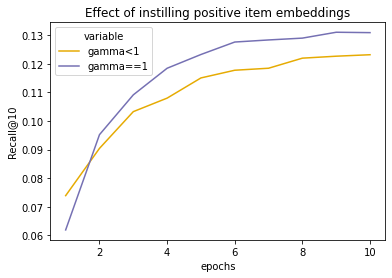

In [14]:
p = lineplot(temp, x = "epochs", y = "value", hue = "variable", palette = "Dark2_r")
p.set(title="Effect of instilling positive item embeddings", xlabel = "epochs",ylabel = "Recall@10")

## Hypothesis testing 2
- 200 samples taken over all epochs

In [37]:
def get_dependent_samples_at_all_epochs(df):
    a = []
    b = []
    for i in range(0,len(df.columns),2):
        col_a = df.columns[i+1]
        col_b = df.columns[i]
        a.extend(df[col_a].tolist())
        b.extend(df[col_b].tolist())
    return a,b

In [38]:
a,b = get_dependent_samples_at_all_epochs(results0.iloc[:,1:])

In [39]:
stats.ttest_rel(a,b, alternative = "greater")

Ttest_relResult(statistic=-4.206733018069139, pvalue=0.9999800073687154)